Nama : Aisy Al Fawwaz

Asal : Gresik

Universitas : Universitas Airlangga

# Prediksi Harga Tiket Pesawat
## Domain proyek
Domain yang saya pilih pada proyek ini adalah **Bisnis Aviasi/Penerbangan**.
Untuk itu saya menganalisis sebuah dataset **Flight Price Prediction** yang saya dapatkan di platform kaggle, disini saya menganalisis  dataset pemesanan penerbangan yang diperoleh dari situs web “Ease My Trip” dan melakukan berbagai uji hipotesis statistik untuk mendapatkan informasi yang bermakna darinya. Algoritme statistik 'Regresi Linier' akan digunakan untuk melatih kumpulan data dan memprediksi variabel target berkelanjutan. 'Easemytrip' adalah platform internet untuk memesan tiket pesawat, dan karenanya merupakan platform yang digunakan calon penumpang untuk membeli tiket. Studi menyeluruh terhadap data akan mmemberikan wawasan berharga yang akan sangat bermanfaat bagi calon penumpang dalam memilih maskapai penerbangan yang sesuai
## Business Understanding.

### Problem Statements


1. Apakah harga tiket tiap maskapai bervariasi ?
2. Bagaimana pengaruh harga jika tiket dibeli hanya dalam 1 atau 2 hari sebelum keberangkatan?
3. Apakah harga tiket berubah berdasarkan waktu keberangkatan dan waktu kedatangan?
4. Apakah harga tiker berubah jika terjadi perubahan Asal dan Tujuan keberangkatan ?
5. Apakah jumlah transit mempengaruhi harga tiket ?
6. Variabel apa yang paling mempengaruhi harga tiket?

### Goals

Membuat prediksi harga tiket pesawat agar para pembeli dapat dengan mudah memperhitungkan harga tiket pesawat di lain waktu

### Solution statements

Solution Statements yang akan dilakukan adalah dengan menerapkan 4 algoritma Machine Learning yaitu :


- **K-Nearest Neighbor**.<br>
  KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

- **LinearRegression**.<br>
   Linear Regression adalah variasi algoritma  Decision Trees yang membantu menghitung hubungan linier antara variabel dependen dan independen, lalu menggunakan hubungan tersebut untuk prediksi. 

- **XGBRegressor**.<br>
 XGBoostRegressor merupakan salah satu algoritma yang paling populer dan paling banyak digunakan karena algoritma ini termasuk algoritma yang powerful. Pada dasarnya, algoritma ini sama dengan algoritma gradient boost hanya saja menggunakan beberapa proses tambahan sehingga lebih powerful. Proses tersebut adalah pemangkasan, newton boosting, dan parameter pengacakan ekstra.

- **CatBoostRegressor**.<br>
  CatBoostRegressor adalah library yang populer dan berkinerja tinggi dari algoritma Gradient Boosting Decision Tree (GBDT). GBDT adalah algoritma pembelajaran yang diawasi yang mencoba memprediksi variabel target secara akurat dengan menggabungkan ansambel perkiraan dari serangkaian model yang lebih sederhana dan lebih lemah.


Pertama kali yang dilakukan yaitu menginstal library opendatasets karena datasets yang digunakan berasal dari kaggle

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Selanjutnya adalah mengimport library yang dibutuhkan 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from catboost import CatBoostRegressor

from scipy import stats

Mendownload datasets dari kaggle dengan library opendatasets

In [ ]:
od.download('https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fawwaz11
Your Kaggle Key: ··········


100%|██████████| 4.16M/4.16M [00:00<00:00, 55.8MB/s]

## Data Understanding

Data atau dataset yang digunakan pada proyek machine learning ini adalah data **flight Price Prediction** yang didapat dari situs kaggle. Link dataset dapat dilihat dari tautan berikut [Clean_Dataset.csv](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

Variabel-variabel pada Flight Price Prediction dataset adalah sebagai berikut :

Berbagai fitur dari kumpulan data yang dibersihkan dijelaskan di bawah ini:
1. Airline : Nama perusahaan penerbangan disimpan di kolom maskapai penerbangan. Ini adalah fitur kategoris yang memiliki 6 maskapai berbeda.
2. Flight : Penerbangan menyimpan informasi mengenai kode penerbangan pesawat. Ini adalah fitur kategorikal.
3. Source City : Kota tempat penerbangan lepas landas. Ini adalah fitur kategoris yang memiliki 6 kota unik.
4. Departure time: Ini adalah fitur kategoris turunan yang diperoleh dengan mengelompokkan periode waktu ke dalam bin. Ini menyimpan informasi tentang waktu keberangkatan dan memiliki 6 label waktu unik.
5. Stops: Fitur kategorikal dengan 3 nilai berbeda yang menyimpan jumlah perhentian antara kota sumber dan tujuan.
6. Arrival time : Ini adalah fitur kategorikal turunan yang dibuat dengan mengelompokkan interval waktu ke dalam nampan. Ini memiliki enam label waktu yang berbeda dan menyimpan informasi tentang waktu kedatangan.
7. Destination City : Kota dimana penerbangan akan mendarat. Ini adalah fitur kategoris yang memiliki 6 kota unik.
8. Class: Fitur kategorikal yang berisi informasi tentang kelas kursi; ia memiliki dua nilai berbeda: Bisnis dan Ekonomi.
9. Duration: Fitur berkelanjutan yang menampilkan jumlah keseluruhan waktu yang diperlukan untuk melakukan perjalanan antar kota dalam hitungan jam.
10. Days Left : Ini adalah karakteristik turunan yang dihitung dengan mengurangkan tanggal perjalanan dengan tanggal pemesanan.
11. Price: Variabel target menyimpan informasi harga tiket.

membuat path yang isinya merupakan alamat(path) tempat file Clean_Dataset.csv berada.

In [ ]:
path = '/content/flight-price-prediction/Clean_Dataset.csv'
flight = pd.read_csv(path)
flight

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Cek tipe data yang digunakan pada setiap kolom

In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Mengecek Missing value

In [ ]:
flight.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Mengecek deskripsi statistik data flight price prediction

In [ ]:
flight.describe(include='all')

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


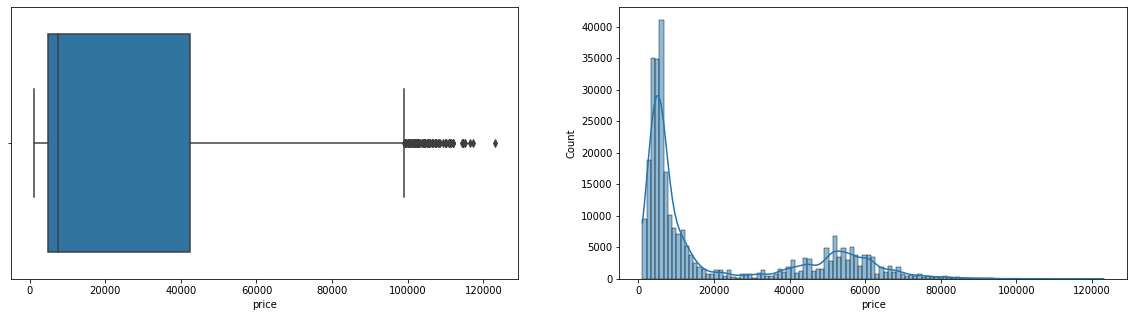

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = flight, kde = True,)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = flight)

Meskipun rata-ratanya sekitar 20000, kita dapat melihat di sini bahwa mediannya sekitar 7500. Perbedaan ini dapat dijelaskan dengan adanya dua tiket yang berbeda: bisnis dan ekonomi. Pada grafik kedua, kita dapat melihat bahwa dispersi tampaknya terdiri dari dua kurva gaussian.

**Fitur perbedaan harga tiket antara kelas Ekonomi dan Bisnis?**

Untuk memvisualisasikan perbedaan antara kedua jenis tiket tersebut, saya akan melakukan plot terhadap harga untuk kedua harga tiket bisnis dan ekonomi dari perusahaan maskpai yang berbeda.

Text(0.5, 1.0, 'Harga tiket berdasarkan kelas dan perusahaan')

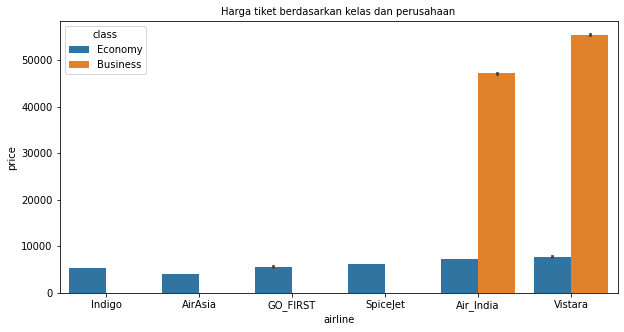

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='airline',y='price',hue="class",data=flight.sort_values("price")).set_title('Harga tiket berdasarkan kelas dan perusahaan',fontsize=10)

Penerbangan bisnis hanya tersedia di dua perusahaan: Air India dan Vistara. Selain itu, terjadi selisih harga yang cukup besar di antara kedua kelas tersebut yang mencapai hampir 5 kali lipat dari harga tiket Ekonomi

**Fitur perbedaan harga tiket tiap maskapai**
Untuk membandingkan harga antara perusahaan saya hanya akan membandingkan jenis tiket yang sama karena pertanyaan sebelumnya menunjukkan bahwa kelas berdampak besar pada harga akhir.

Text(0.5, 1.0, 'kelas bisnis')

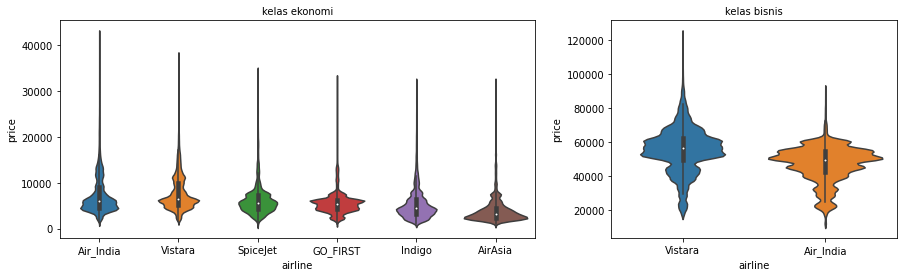

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(15, 4))
sns.violinplot(y = "price", x = "airline",data = flight.loc[flight["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("kelas ekonomi",fontsize=10)
sns.violinplot(y = "price", x = "airline",data = flight.loc[flight["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("kelas bisnis",fontsize=10)

Dari visualisasi diatas, ada sedikit perbedaan antara masing-masing perusahaan pada grafik ini, AirAsia tampaknya memiliki penerbangan termurah saat Air India dan Vistara lebih mahal. Namun sepertinya tiket bisnis Vistara sedikit lebih mahal daripada tiket Air India.

**Fitur pengaruh harga jika tiket dibeli hanya dalam 1 atau 2 hari sebelum keberangkatan?**

Untuk memvisualisasikan bagaimana harga berubah tergantung pada jumlah hari yang tersisa, saya akan menghitung harga rata-rata tergantung pada hari yang tersisa, untuk mencoba memahami pola kurva.

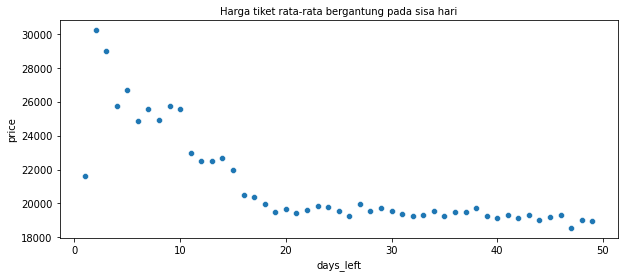

In [ ]:
df_temp = flight.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(10,4))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Harga tiket rata-rata bergantung pada sisa hari",fontsize=10)

Ada kemungkinan untuk melihat dua kurva berbeda pada grafik ini, yang pertama, stabil antara 50 dan 20 hari sebelum penerbangan, dan kurva monoton positif antara 20 dan 2 hari sebelumnya.

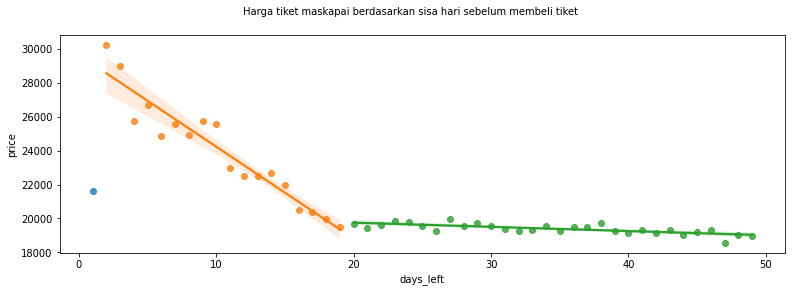

In [ ]:
plt.figure(figsize=(13,4)).suptitle('Harga tiket maskapai berdasarkan sisa hari sebelum membeli tiket', fontsize=10)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

data diatas menvisualisasikan bagaimana harga naik perlahan dan kemudian secara drastis naik pada 20 hari sebelum penerbangan, tetapi turun hanya satu hari sebelum penerbangan hingga tiga kali lebih murah. Hal ini dapat dijelaskan  bahwa perusahaan ingin mengisi kursi kosong mereka sehingga menurunkan harga tiket untuk memastikan kursi pesawat terisi


**Fitur harga berubah seiring durasi penerbangan**

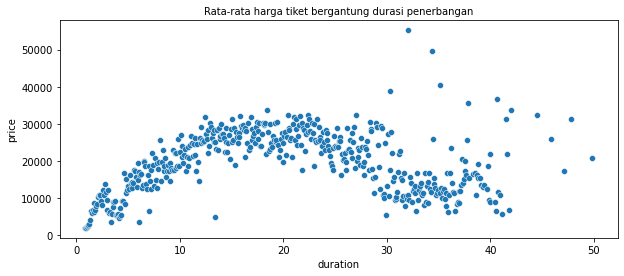

In [ ]:
df_temp = flight.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(10,4))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Rata-rata harga tiket bergantung pada durasi penerbangan",fontsize=10)

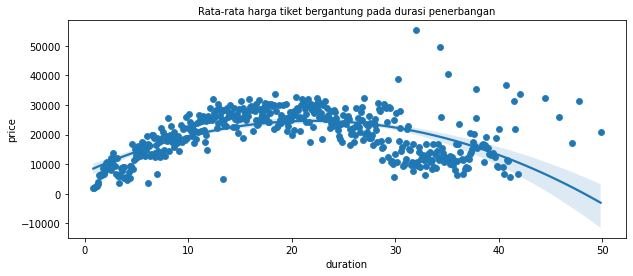

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Rata-rata harga tiket bergantung pada durasi penerbangan",fontsize=10)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

Dari visualisasi data diatas dapat diamati  di sini hubungan tersebut tidak linier tetapi dapat didekati dengan kurva derajat kedua. Harga mencapai harga tinggi dalam durasi 20 jam sebelum turun lagi.Namun terdapat outlier tampaknya mempengaruhi kurva regresi.

**Fitur harga tiket berubah berdasarkan waktu keberangkatan dan waktu kedatangan?**

Text(0.5, 1.0, 'harga tiket berdasarkan waktu kedatangan')

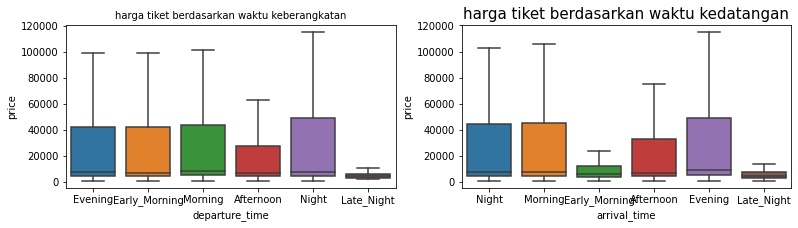

In [ ]:
plt.figure(figsize = (13,3))
plt.subplot(1,2,1)
sns.boxplot(data=flight, y="price", x="departure_time",showfliers=False).set_title("harga tiket berdasarkan waktu keberangkatan",fontsize=10)
plt.subplot(1,2,2)
sns.boxplot(data=flight, y="price", x="arrival_time",showfliers=False).set_title("harga tiket berdasarkan waktu kedatangan",fontsize=15)

dari visualisasi dapat dapat diamati bahwa berangkat di malam hari atau tiba di malam hari tetap menjadi cara termurah untuk bepergian. Tetapi juga terlihat bahwa tiba lebih awal juga murah dan penerbangan sore sedikit lebih murah daripada penerbangan sore, pagi dan malam.

**Fitur  harga tiket pada asal dan Tujuan?**

Text(0.5, 0.98, 'Harga tiket berdasarkan asal dan tujuan')

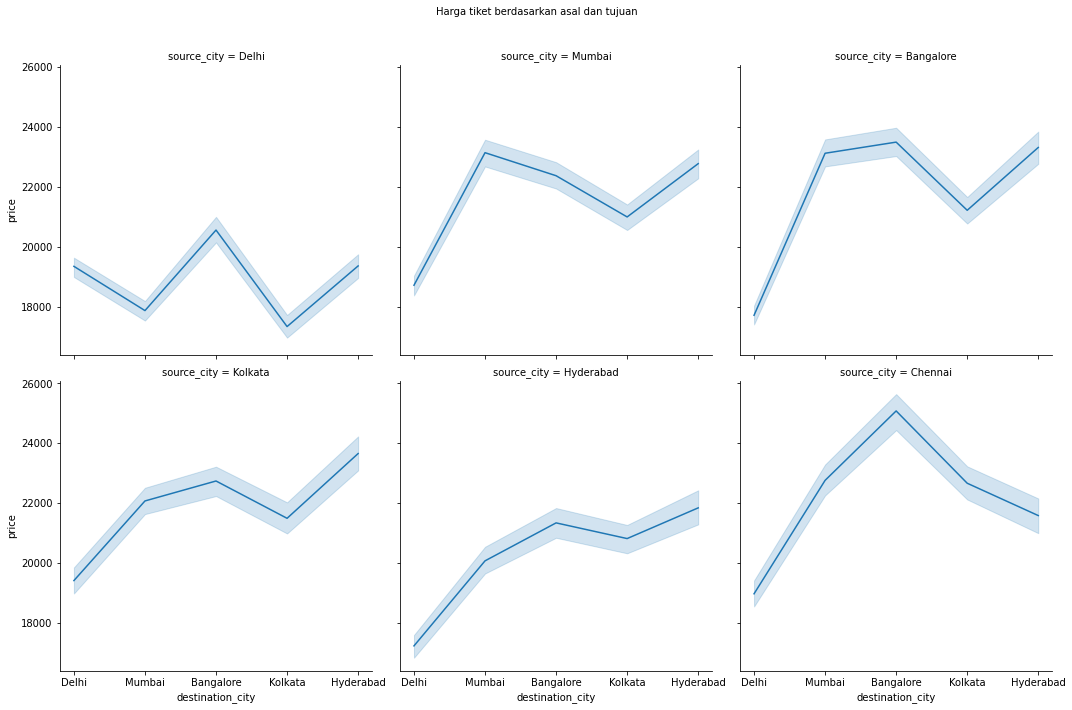

In [ ]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=flight, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Harga tiket berdasarkan asal dan tujuan',fontsize=10)

Di satu sisi, tampaknya penerbangan yang berangkat dari Delhi seringkali lebih murah daripada dari kota sumber lain dan ibu kota juga merupakan tujuan termurah mungkin karena sebagai ibu kota, bandara adalah yang terbesar dan menawarkan lebih banyak penerbangan. Di sisi lain, harganya kurang lebih sama dan Hyderabad menjadi tujuan termahal.

**Fitur jumlah perhentian mempengaruhi harga?**

Text(0.5, 1.0, 'Harga tiket bisnis')

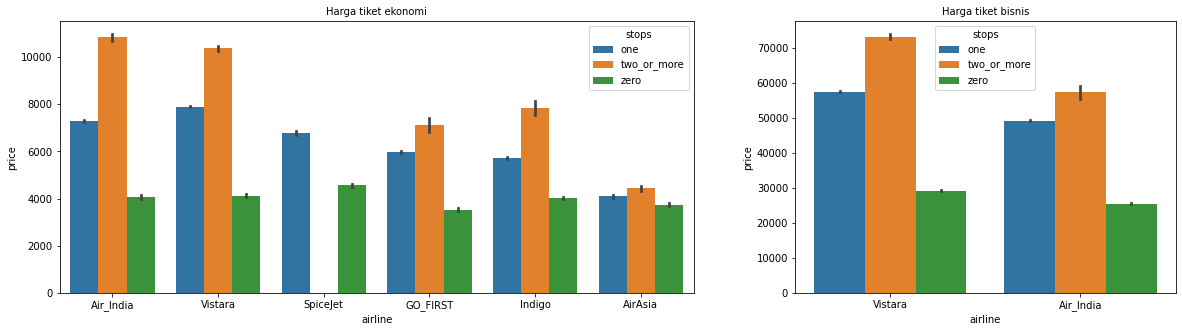

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(20, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = flight.loc[flight["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Harga tiket ekonomi",fontsize=10)
sns.barplot(y = "price", x = "airline",hue="stops",data = flight.loc[flight["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Harga tiket bisnis",fontsize=10)

dari visualisasi diatas didabatkan bahwa banyak semakin banyak pemberhentian maka harga tiket semakin naik

**Variabel apa yang paling mempengaruhi harga?**

In [ ]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return df

In [ ]:
df_preprocessed = preprocessing(flight)

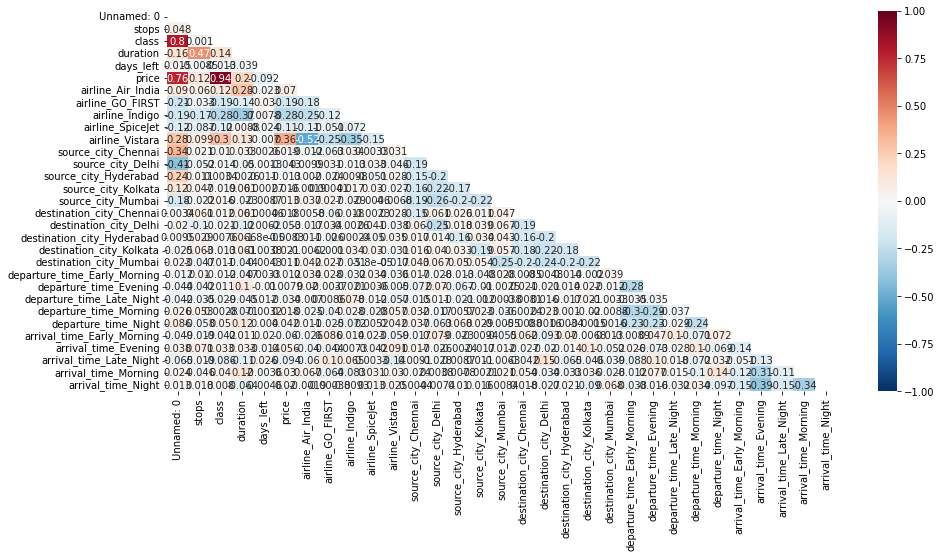

In [ ]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))

plt.figure(figsize = (15,7))
sns.heatmap(df_preprocessed.corr(), data = df_preprocessed, mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

## Data Preparation

Data preparation yang digunakan oleh saya yaitu :

- Membagi data menjadi data training dan test : untuk membagi data untuk dilatih dan tes.

In [ ]:
def load_data():
    # Read data
    df = pd.read_csv('/content/flight-price-prediction/Clean_Dataset.csv')
    # Preprocessing the data
    
    df = preprocessing(df)
    
    X = df.copy()
    y = X.pop("price")
    
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 1,test_size=0.2, shuffle=True)
    
    return xtrain,xtest,ytrain,ytest

In [ ]:
xtrain,xtest,ytrain,ytest = load_data()

## Modeling

Proses modeling yang saya lakukan pada data ini adalah dengan menggabungkan empat algoritma machine learning kemudian dicari performa yang paling baik dari keempat algoritma machine learning tersebut.



## Model Development dengan K-Nearest Neighbor, Linear Regression, XGB Reressor, dan CatBoostRegressor

In [ ]:
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["XGBRegressor"]={"model":XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
models["CatBoostRegressor"]={"model":CatBoostRegressor(logging_level ='Silent',iterations=500,random_state=1)}

In [ ]:
def score_dataset(X, y, model=XGBRegressor()):
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    
    score_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
    score_r2 = score_r2.mean()
    
    return score_r2

In [ ]:
 def get_scores(models,xtrain,ytrain):
    for name,model in models.items():
        model["model"].fit(xtrain,ytrain)

        score_r2 = score_dataset(xtrain, ytrain, model=model["model"])
        score = {'model':"Linear regression", 'score_r2':score_r2}
        print("--- "+name+" ---")
        print("Score r2: {}".format(score_r2))
        print("\n")

In [ ]:
get_scores(models,xtrain,ytrain)

--- KNeighborsRegressor ---
Score r2: 0.8998353555021547


--- LinearRegression ---
Score r2: 0.9105112379201135


[09:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- XGBRegressor ---
Score r2: 0.9824695577848084


--- CatBoostRegressor ---
Score r2: 0.9749838715387558




Tampaknya hasil terbaik diberikan oleh XGBRegressor. Ini mungkin dijelaskan oleh fakta bahwa beberapa hubungan tidak linier seperti durasi atau hari_tersisa. Jadi algoritma yang lebih fleksibel seperti XGBRegressor cenderung memberikan hasil yang lebih baik.


## Model Development dengan XGBRegressor

In [ ]:
model = models["XGBRegressor"]["model"]
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

[09:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


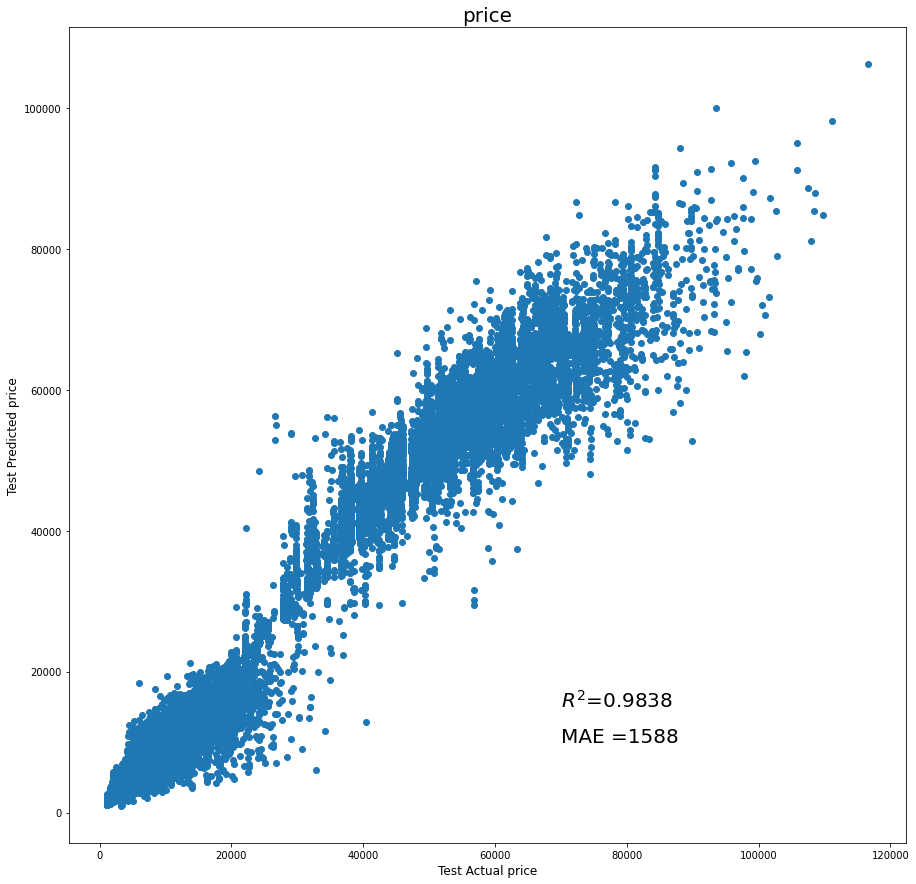

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(ytest,ypred)

score_r2 = r2_score(ytest, ypred) 
score_mae = mean_absolute_error(ytest, ypred)
plt.text(70000,15000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=20)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=20)
plt.show()

## Evaluation

Evaluasi metrik yang digunakan untuk mengukur kinerja model adalah metrik MAE (Mean absolute  Error), karena kasus yang saya pilih merupakan kasus regresi.


MAE pada dasarnya  adalah rata-rata selisih mutlak nilai sebenarnya (aktual) dengan nilai prediksi (peramalan).makin tinggi nilai ini, makin buruk modelnya. Nilai MAE tidak pernah negatif, karena kita menguadratkan kesalahan prediksi individu sebelum menjumlahkannya, tetapi akan menjadi nol untuk model yang sempurna.

Oleh karena itu didapatkan kesimpulan bahwa :

1. Model yang memberikan hasil terbaik adalah XGBRegressor dengan pada dataset uji skor R^2 sama dengan 0,9836 dan skor MAE sama dengan 1579. 

2. Ada gap yang besar antara tiket pesawat di bisnis dan ekonomi. Rata-rata tiket bisnis 6,5 kali lebih mahal daripada tiket ekonomi.

3. Vistara dan AirIndia tampaknya menjadi perusahaan termahal dan AirAsia termurah. Namun untuk tiket bisnis, hanya Vistara dan AirIndia yang tersedia, dan Vistara sedikit lebih mahal.

4. Secara umum, harga naik cukup lambat hingga 20 hari sebelum penerbangan dimana harga naik drastis. Namun satu hari sebelum penerbangan, biasanya masih ada kursi kosong yang belum terjual. Dengan demikian dimungkinkan untuk menemukan tiket tiga kali lebih murah dari hari sebelumnya.

5. Semakin lama penerbangan semakin mahal tiketnya hingga mencapai sekitar 20 jam, maka harganya cenderung turun.

6. Keberangkatan sore dan larut malam lebih murah, dan malam hari lebih mahal. dan keberangkatan pagi, siang dan larut malam lebih murah, dan malam hari lebih mahal.

7. Penerbangan dari Delhi adalah yang termurah dari kota-kota lain rata-rata tampaknya sama tetapi sedikit lebih mahal untuk Chenai.
Penerbangan ke Delhi adalah yang termurah dan ke Bengalore yang paling mahal.

8. Secara umum, semakin banyak pemberhentian, semakin mahal harga tiket pesawatnya.